DATA LOADING AND INSPECTION
--------

In [1]:
#Importing libraries

#Packages for numeric
import pandas as pd
import numpy as np

#Packages for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold, KFold
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report, accuracy_score,log_loss# performance metrics
from scipy import stats
from sklearn import metrics
#from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler


#Classifier module
from sklearn.linear_model import LogisticRegression


# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data.
telecom = pd.read_csv('tele-churn.csv')

Data Preprocessing
------------
Encoding
----------

In [3]:
# Removing the phone number and state column
df1 = telecom.drop(['phone number', 'state', 'area code'], axis=1)

# change categorical data into numerical data
df1['international plan'] = df1['international plan'].map({'no': 0, 'yes': 1})
df1['voice mail plan'] = df1['voice mail plan'].map({'no': 0, 'yes': 1})
df1['churn'] = df1['churn'].map({False : 0, True : 1})

FEATURES SCALING / STANDARDIZATION
--------

In [4]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Define function for scaling a column
def scaling(column):
    return scaler.fit_transform(df1[[column]])

# Iterate through numerical columns and scale them
for column in df1.select_dtypes(include=[np.number]).columns:
    df1[[column]] = scaling(column)

In [5]:
# Creating a Test and Train Dataset
y = df1['churn']
X = df1.drop(['churn'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

# Check the shapes of the split dataprint("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Train set size:", y_train.shape)
print("Test set size:", y_test.shape)

Test set size: (600, 17)
Train set size: (2733,)
Test set size: (600,)


SMOTE
--------

In [6]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# Resample the training data

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shape of the resampled data
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("\nValue counts of y_train_resampled:\n", y_train_resampled.value_counts())

Shape of X_train_resampled: (4676, 17)

Value counts of y_train_resampled:
 churn
0.0    2338
1.0    2338
Name: count, dtype: int64


DATA MODELING
------------
LOGISTIC REGRESSION
-----------

In [7]:
#Initialize the Logistic Regression model
lr = LogisticRegression()

#Train the model
lr.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_lr = lr.predict(X_test)


#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
auc_roc = roc_auc_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy :.4f}")
print(f"Logistic Regression Precision: {precision :.4f}")
print(f"Logistic Regression recall: {recall :.4f}")
print(f"Logistic Regression f1_score: {f1 :.4f}")
print(f"Logistic Regression auc_roc: {auc_roc :.4f}")
print(classification_report(y_test, y_pred_lr))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))


print("Training Accuracy :", lr.score(X_train, y_train))

print("Testing Accuracy :", lr.score(X_test, y_test))

Logistic Regression Accuracy: 0.7767
Logistic Regression Precision: 0.3693
Logistic Regression recall: 0.7386
Logistic Regression f1_score: 0.4924
Logistic Regression auc_roc: 0.7609
              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86       512
         1.0       0.37      0.74      0.49        88

    accuracy                           0.78       600
   macro avg       0.66      0.76      0.67       600
weighted avg       0.86      0.78      0.80       600

Confusion Matrix:
 [[401 111]
 [ 23  65]]
ROC AUC Score: 0.83251953125
Training Accuracy : 0.7749725576289791
Testing Accuracy : 0.7766666666666666


 CONFUSION MATRIX FOR LOGISTIC REGRESSION
--------------

In [8]:
y_pred_lr = lr.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_lr).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 65
False positives: 111
True negatives: 401
False negatives: 23



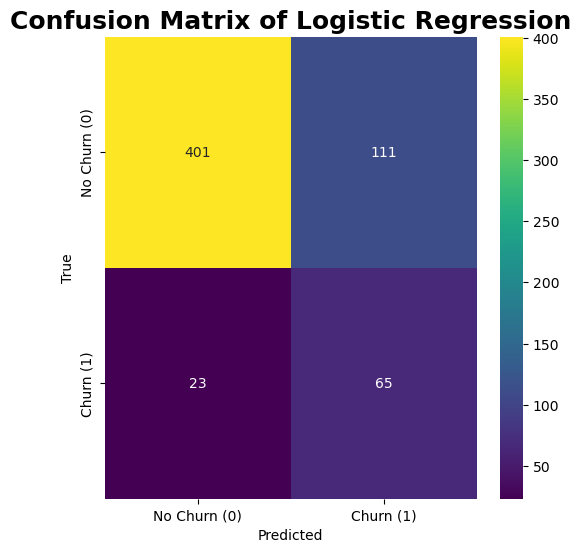

In [9]:
#Build confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)

#Visualize the Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d',
            xticklabels=['No Churn (0)', 'Churn (1)'],
         yticklabels=['No Churn (0)', 'Churn (1)'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Logistic Regression', size=18, color='black', fontweight= 'bold')
plt.show()


EVALUATION OF THE MACHINE LEARNING ALGORITHMS
-----------------------

In [10]:
final_data = pd.DataFrame({"ALGORITHMS":["Logistic Regression"], 
                           "ACCURACY":[accuracy_score(y_test, y_pred_lr)*100],
                         "PRECISION":[precision_score(y_test, y_pred_lr)*100],
                          "RECALL":[recall_score(y_test, y_pred_lr)*100],
                          "F1_SCORE":[f1_score(y_test, y_pred_lr)*100], 
                            "ROC_AUC":[roc_auc_score(y_test, y_pred_lr)*100], 
                           
                        })

final_data

,ALGORITHMS,ACCURACY,PRECISION,RECALL,F1_SCORE,ROC_AUC
0,Logistic Regression,77.666667,36.931818,73.863636,49.242424,76.091974


 K_FOLD CROSS VALIDATION
------------

ACCURACY
-------

In [11]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#log_reg = LogisticRegression()
lr_accuracies = cross_val_score(lr, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
print(lr_accuracies)
lr_avg_accuracy = np.mean(lr_accuracies)
lr_std_accuracy = np.std(lr_accuracies)
print(f"The std score of cross validation using Logistic Regression algorithm is {lr_std_accuracy * 100:.2f}%")
print(f"The mean score of cross validation using Logistic Regression (LR) algorithm is {lr_avg_accuracy * 100:.2f}%")

[0.79273504 0.76495726 0.75854701 0.74145299 0.78418803 0.75213675
 0.78586724 0.75588865 0.80728051 0.7751606 ]
The std score of cross validation using Logistic Regression algorithm is 1.96%
The mean score of cross validation using Logistic Regression (LR) algorithm is 77.18%


PRECISION
---

In [12]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#log_reg = LogisticRegression()
lr_precision = cross_val_score(lr, X_train_resampled, y_train_resampled, cv=kf, scoring='precision')
print(lr_precision)
lr_avg_precision = np.mean(lr_precision)
lr_std_precision = np.std(lr_precision)
print(f"The std score of cross validation using Logistic Regression algorithm is {lr_std_precision * 100:.2f}%")
print(f"The mean score of cross validation using Logistic Regression (LR) algorithm is {lr_avg_precision * 100:.2f}%")

[0.79399142 0.7605042  0.76190476 0.73839662 0.78540773 0.74789916
 0.79295154 0.75536481 0.81858407 0.78414097]
The std score of cross validation using Logistic Regression algorithm is 2.37%
The mean score of cross validation using Logistic Regression (LR) algorithm is 77.39%


RECALL
-----

In [13]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
lr_recall = cross_val_score(lr, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
print(lr_recall)
lr_avg_recall = np.mean(lr_recall)
lr_std_recall = np.std(lr_recall)
print(f"The std score of cross validation using Logistic Regression algorithm is {lr_std_recall * 100:.2f}%")
print(f"The mean score of cross validation using Logistic Regression (LR) algorithm is {lr_avg_recall * 100:.2f}%")

[0.79059829 0.77350427 0.75213675 0.74786325 0.78205128 0.76068376
 0.77253219 0.75536481 0.79059829 0.76068376]
The std score of cross validation using Logistic Regression algorithm is 1.48%
The mean score of cross validation using Logistic Regression (LR) algorithm is 76.86%


F1_SCORE
-----------

In [14]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
lr_f1 = cross_val_score(lr, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
print(lr_f1)
lr_avg_f1 = np.mean(lr_f1)
lr_std_f1 = np.std(lr_f1)
print(f"The std score of cross validation using Logistic Regression algorithm is {lr_std_f1 * 100:.2f}%")
print(f"The mean score of cross validation using Logistic Regression (LR) algorithm is {lr_avg_f1 * 100:.2f}%")

[0.79059829 0.77350427 0.75213675 0.74786325 0.78205128 0.76068376
 0.77253219 0.75536481 0.79059829 0.76068376]
The std score of cross validation using Logistic Regression algorithm is 1.48%
The mean score of cross validation using Logistic Regression (LR) algorithm is 76.86%


CHECKING IF IT IS OVERFITTING OR NOT
------------

ACCURACY
----

In [15]:
if lr_avg_accuracy > accuracy:
    print("Model generalizes well: Cross_validation accuracy is higher or close to accuracy")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than accuracy")

Model might be overfitting: Cross validation accuracy is lower than accuracy


PRECISION
----

In [16]:
if lr_avg_precision > precision:
    print("Model generalizes well: Cross_validation accuracy is higher or close to precison")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than precision")

Model generalizes well: Cross_validation accuracy is higher or close to precison


RECALL
--------

In [17]:
if lr_avg_recall > recall:
    print("Model generalizes well: Cross_validation accuracy is higher or close to recall")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than recall")

Model generalizes well: Cross_validation accuracy is higher or close to recall


F1_SCORE
------

In [18]:
if lr_avg_f1 > f1:
    print("Model generalizes well: Cross_validation accuracy is higher or close to F1_SCORE")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than F1_SCORE")

Model generalizes well: Cross_validation accuracy is higher or close to F1_SCORE


AVERAGE KFOLD
----------

In [19]:
final_kfold = pd.DataFrame({"ALGORITHMS":["Logistic Regression"], 
                           "ACCURACY":[lr_avg_accuracy * 100],
                         "PRECISION":[lr_avg_precision * 100],
                          "RECALL":[lr_avg_recall * 100],
                          "F1_SCORE":[lr_avg_f1 * 100],  
                           
                        })

final_kfold

,ALGORITHMS,ACCURACY,PRECISION,RECALL,F1_SCORE
0,Logistic Regression,77.182141,77.391453,76.860167,76.860167
